### Importing Libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format# means that the numbers will be displayed with two decimal places.
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
sns.set()
import plotly.express as px
!pip install -U kaleido
import kaleido#kaleido is a Python package that provides tools for rendering static images or animations of Plotly figures

### Loading and Reading the Dataset

In [22]:
df = pd.read_csv(r'C:\\Users\\HP\\Downloads\\Country (1).csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.20,10.00,7.58,44.90,1610,9.44,56.20,5.82,553
1,Albania,16.60,28.00,6.55,48.60,9930,4.49,76.30,1.65,4090
2,Algeria,27.30,38.40,4.17,31.40,12900,16.10,76.50,2.89,4460
3,Angola,119.00,62.30,2.85,42.90,5900,22.40,60.10,6.16,3530
4,Antigua and Barbuda,10.30,45.50,6.03,58.90,19100,1.44,76.80,2.13,12200


In [23]:
df.shape

(167, 10)

In [24]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [25]:
df.info

<bound method DataFrame.info of                  country  child_mort  exports  health  imports  income  \
0            Afghanistan       90.20    10.00    7.58    44.90    1610   
1                Albania       16.60    28.00    6.55    48.60    9930   
2                Algeria       27.30    38.40    4.17    31.40   12900   
3                 Angola      119.00    62.30    2.85    42.90    5900   
4    Antigua and Barbuda       10.30    45.50    6.03    58.90   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu       29.20    46.60    5.25    52.70    2950   
163            Venezuela       17.10    28.50    4.91    17.60   16500   
164              Vietnam       23.30    72.00    6.84    80.20    4490   
165                Yemen       56.30    30.00    5.18    34.40    4480   
166               Zambia       83.10    37.00    5.89    30.90    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44       56.20      

### Q1. Check for missing values , duplicate values and correlation ? And resolve them accordingly¶

### Missing Value

In [26]:
missing=df.isnull().sum()
missing

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

<Axes: >

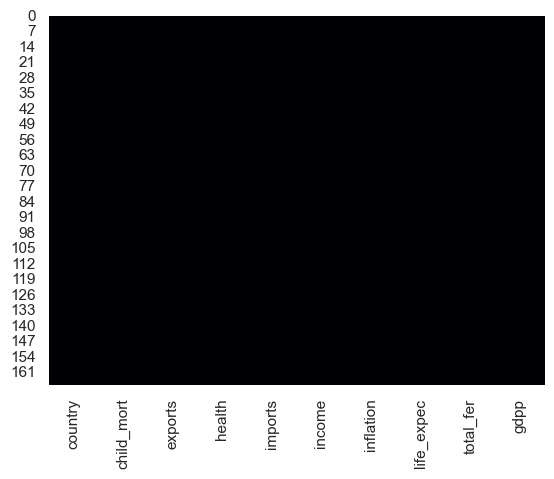

In [27]:
sns.heatmap(df.isnull(),cmap='magma',cbar=False)

#### <center>No missing values are found<center>

### Duplicate Value

In [28]:
df.duplicated().any()

False

#### <center>No Duplicates Found<center>

In [29]:
df.describe

<bound method NDFrame.describe of                  country  child_mort  exports  health  imports  income  \
0            Afghanistan       90.20    10.00    7.58    44.90    1610   
1                Albania       16.60    28.00    6.55    48.60    9930   
2                Algeria       27.30    38.40    4.17    31.40   12900   
3                 Angola      119.00    62.30    2.85    42.90    5900   
4    Antigua and Barbuda       10.30    45.50    6.03    58.90   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu       29.20    46.60    5.25    52.70    2950   
163            Venezuela       17.10    28.50    4.91    17.60   16500   
164              Vietnam       23.30    72.00    6.84    80.20    4490   
165                Yemen       56.30    30.00    5.18    34.40    4480   
166               Zambia       83.10    37.00    5.89    30.90    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44       56.20    

### Correlation 

Text(0.5, 1.0, 'Correlation Matrix : Lower Triangular Format')

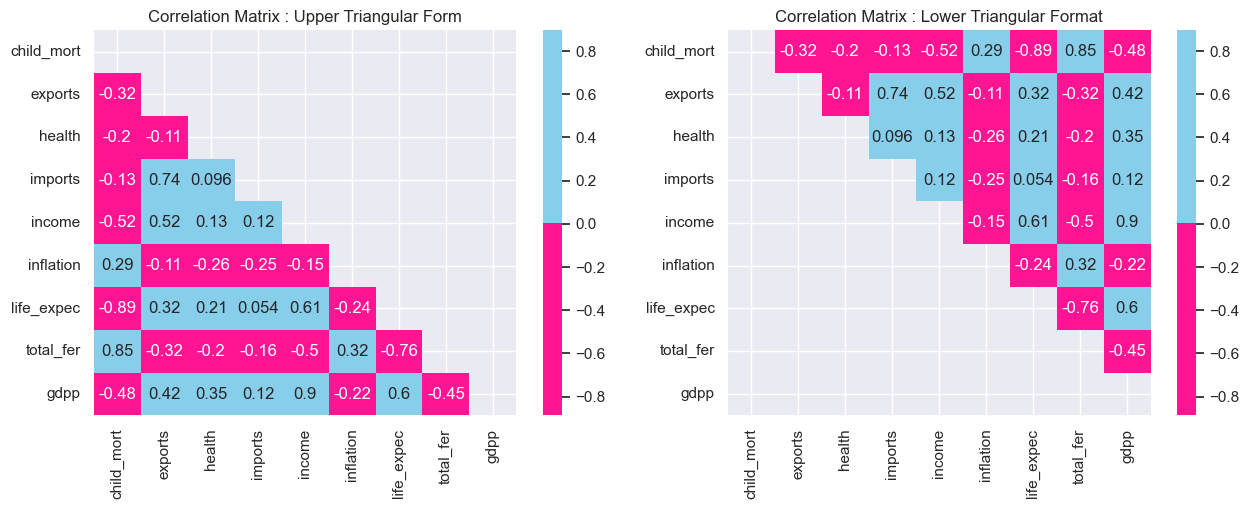

In [33]:
ut = np.triu(df.corr())
lt = np.tril(df.corr())
colors = ['#FF1493','#87CEEB']
fig,ax = plt.subplots(nrows = 1, ncols = 2,figsize = (15,5))
plt.subplot(1,2,1)
sns.heatmap(df.corr(),cmap=colors,annot = True,cbar = 'True',mask = ut)
plt.title('Correlation Matrix : Upper Triangular Form')

plt.subplot(1,2,2)
sns.heatmap(df.corr(),cmap = colors,annot = True,cbar = 'True',mask = lt)
plt.title('Correlation Matrix : Lower Triangular Format')
         


Many features have relationships with each other.
child_mort clearly increases when income, gdpp & exports decreases. Rise in inflation also leads to high child_mort cases. Economic conditions unfortunately act as an important factor!
Rise in exports clearly increases gdpp, income & imports.
Spending on health has a small rise in life_expec and also decreases the child_mort.
income & gdpp display a very high 0.9 correlation value. From the health perspective, high income has lead to higher life_expec but decreases the total_fer by some significant margin.
As expected high inflation has a negative effect on the financial features. High inflation displays a high total_fer and child_mort. This describes the typical features of a backward nation.According to the data, higher life_expec displays a low total_fer. Higher gdpp has lead more spending on health.
We can clearly see that some features are essentially from the same category and they have the same reaction to other features of different category.

The 3 categories of the features are :
health : child_mort, health, life_expec, total_fer
trade : imports, exports
finance : income, inflation, gdpp

### Q2. Which countries should be provided with the aid ?

The variables can be didived into economic metrics(exports, imports, income, inflation, gdpp, health), health metrics(child_mort, life_expec, total_fer).

### Distribution of features

In [34]:
col = list(df.columns)
col.remove('country')
categorical_features = ['country']
numerical_features = [*col]# * removes the quotations and brackets
print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)


Categorical Features : country
Numerical Features : child_mort exports health imports income inflation life_expec total_fer gdpp


For this dataset, as the number of features are less, we manually check the dataset.
Clearly, except country, all the features are numerical features with their element datatype being either float or integer.
We use the typical approach for division of features i.e based on the datatypes of the elements of the respective feature.
Eg : datatype = integer, feature = numerical feature ; datatype = string, feature = categorical feature

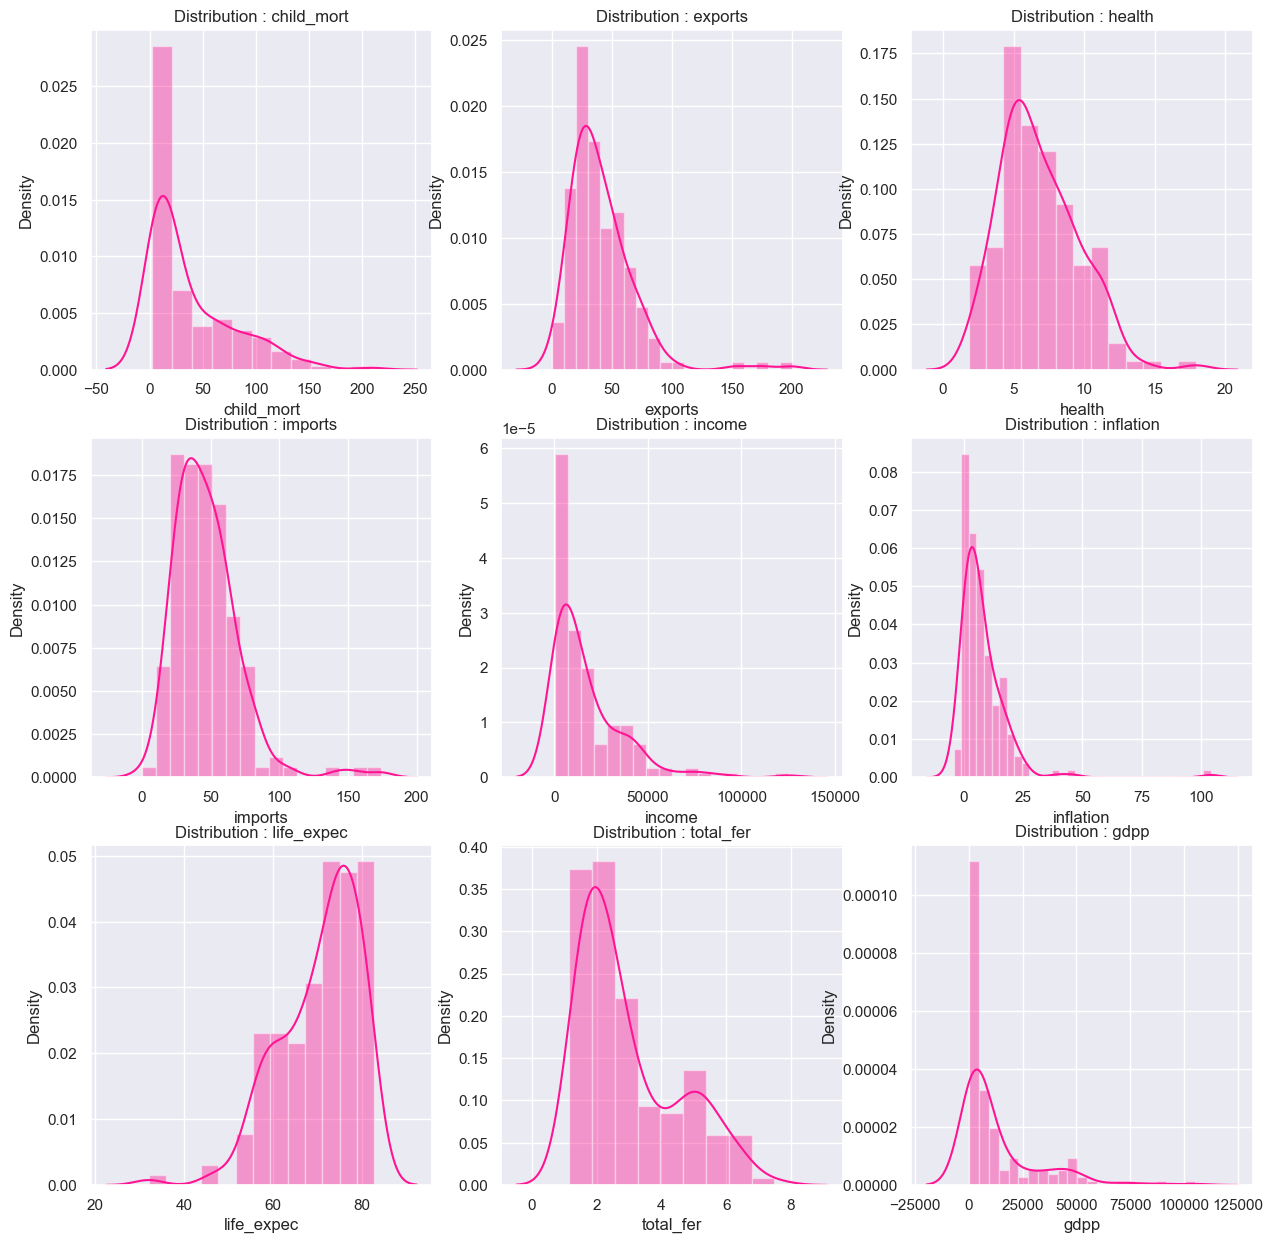

In [36]:
fig, ax = plt.subplots(nrows = 3,ncols = 3,figsize = (15,15))
for i in range(len(numerical_features)):
    plt.subplot(3,3,i+1)
    sns.distplot(df[numerical_features[i]],color = colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()


The variables can be didived into economic metrics(exports, imports, income, inflation, gdpp, health), health metrics(child_mort, life_expec, total_fer).

In [37]:
# seperate the country column with rest of the variable
df.index=df.iloc[:,0]

In [38]:
df.index# index value is changed to country

Index(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       ...
       'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay',
       'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam', 'Yemen', 'Zambia'],
      dtype='object', name='country', length=167)

In [39]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,,
Afghanistan,Afghanistan,90.20,10.00,7.58,44.90,1610,9.44,56.20,5.82,553
Albania,Albania,16.60,28.00,6.55,48.60,9930,4.49,76.30,1.65,4090
Algeria,Algeria,27.30,38.40,4.17,31.40,12900,16.10,76.50,2.89,4460
Angola,Angola,119.00,62.30,2.85,42.90,5900,22.40,60.10,6.16,3530
Antigua and Barbuda,Antigua and Barbuda,10.30,45.50,6.03,58.90,19100,1.44,76.80,2.13,12200


In [40]:
df1=df.copy()

In [41]:
from sklearn.cluster import KMeans

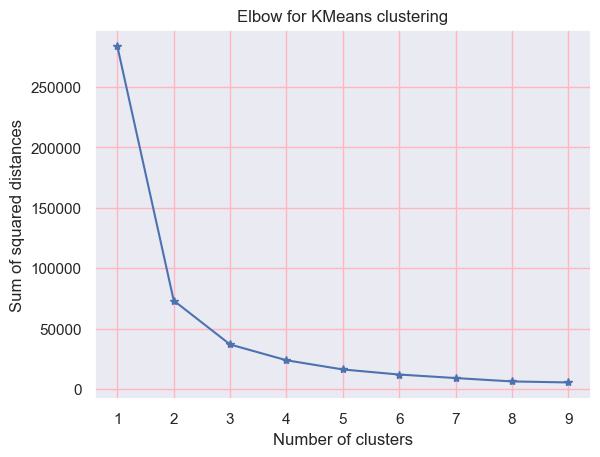

In [52]:
# Clustering based on health factors(child_mort, life_expec, total_fer)
df_clust1=df[['child_mort', 'life_expec', 'total_fer']]

#Plot sum of squared distance (elbow method)
K=range(1,10)
df_km=[KMeans(n_clusters=k).fit(df_clust1) for k in K]
ssd=[df_km[k].inertia_ for k in range(len(df_km))]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, ssd, 'b*-')
plt.grid(True,color="#FFB6C1")
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow for KMeans clustering')
plt.show()

In [48]:
# Considering k=3
kmeans = KMeans(n_clusters=3)
model = kmeans.fit(df_clust1)
pred = model.labels_
df1['cluster_km'] = pred
df1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_km,clust1,clust2
country,,,,,,,,,,,,,
Afghanistan,Afghanistan,90.20,10.00,7.58,44.90,1610,9.44,56.20,5.82,553,1,0.65,3.66
Albania,Albania,16.60,28.00,6.55,48.60,9930,4.49,76.30,1.65,4090,0,0.08,4.15
Algeria,Algeria,27.30,38.40,4.17,31.40,12900,16.10,76.50,2.89,4460,0,0.21,5.38
Angola,Angola,119.00,62.30,2.85,42.90,5900,22.40,60.10,6.16,3530,2,0.82,6.34
Antigua and Barbuda,Antigua and Barbuda,10.30,45.50,6.03,58.90,19100,1.44,76.80,2.13,12200,0,0.08,5.49


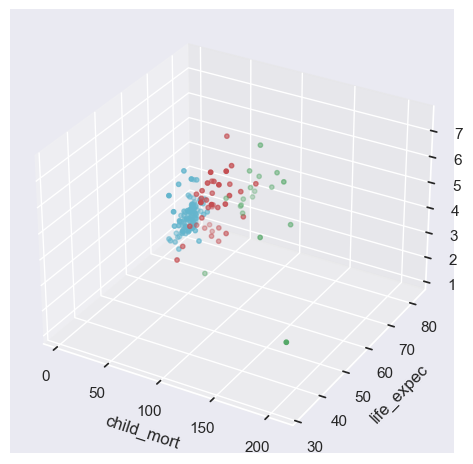

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
cluster_0 = df1.query('cluster_km==0')#The query() method filters the data_1 DataFrame to include only the rows where the value in the cluster_km column is equal to 0
cluster_1 = df1.query('cluster_km==1')
cluster_2 = df1.query('cluster_km==2')
plt.grid(True,color="#FFB6C1")
plt_0 = ax.scatter(cluster_0['child_mort'], cluster_0['life_expec'], cluster_0['total_fer'], c='c', s=10)
plt_1 = ax.scatter(cluster_1['child_mort'], cluster_1['life_expec'], cluster_1['total_fer'], c='r', s=10)
plt_2 = ax.scatter(cluster_2['child_mort'], cluster_2['life_expec'], cluster_2['total_fer'], c='g', s=10)
ax.set_xlabel('child_mort')
ax.set_ylabel('life_expec')
ax.set_zlabel('total_fer')
plt.tight_layout()
plt.show()

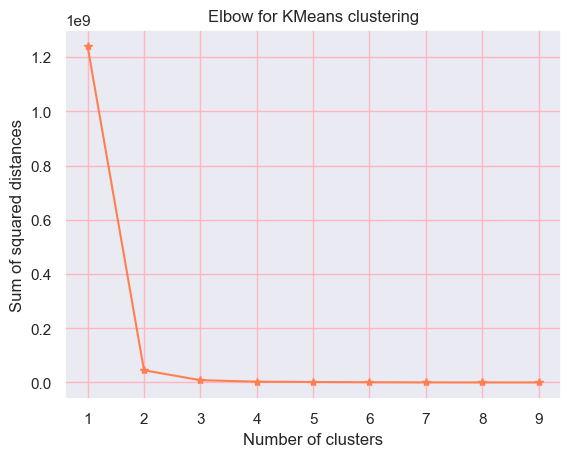

In [51]:
# Clustering based on the economic factors
df_clust2=cluster_2[['income','gdpp','health']]
K=range(1,10)
clust2=[KMeans(n_clusters=k).fit(df_clust2) for k in K]
ssd=[clust2[k].inertia_ for k in range (len(df_km))]
fig = plt.figure()
ax = fig.add_subplot(111)#fig.add_subplot(111) is used to create a subplot within a figure (fig). The add_subplot() function allows you to divide the figure into multiple subplots, making it easier to display multiple plots in a single figure.
ax.plot(K, ssd, 'b*-',color="#FF7F50")
plt.grid(True,color="#FFB6C1")
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow for KMeans clustering')
plt.show()


In [54]:
kmeans=KMeans(n_clusters=2)
model=kmeans.fit(df_clust2)

In [56]:
pred=model.labels_
cluster_2['cluster_km'] = pred
cluster_2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_km,clust1,clust2
country,,,,,,,,,,,,,
Angola,Angola,119.00,62.30,2.85,42.90,5900,22.40,60.10,6.16,3530,0,0.82,6.34
Benin,Benin,111.00,23.80,4.10,37.20,1820,0.89,61.80,5.36,758,0,0.74,2.25
Burkina Faso,Burkina Faso,116.00,19.20,6.74,29.60,1430,6.81,57.90,5.87,575,0,0.78,3.09
Cameroon,Cameroon,108.00,22.20,5.13,27.00,2660,1.91,57.30,5.11,1310,0,0.69,2.37
Central African Republic,Central African Republic,149.00,11.80,3.98,26.50,888,2.01,47.50,5.21,446,0,0.87,1.78


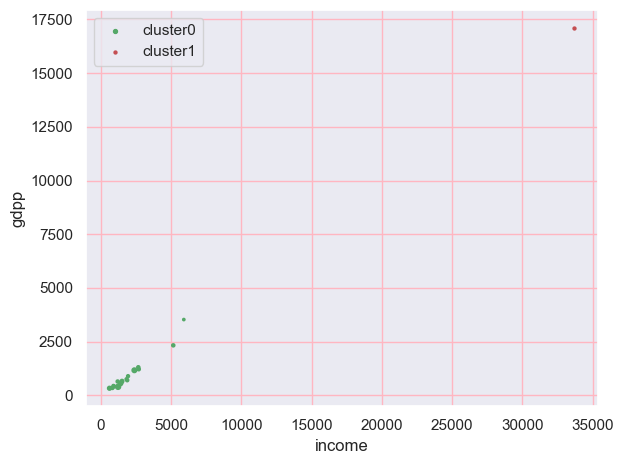

In [64]:
fig = plt.figure()
ax = fig.add_subplot(111)
cluster_2_0 = cluster_2.query('cluster_km==0')
cluster_2_1 = cluster_2.query('cluster_km==1')
cluster_2_2 = cluster_2.query('cluster_km==2')
plt_0 = ax.scatter(cluster_2_0['income'], cluster_2_0['gdpp'], cluster_2_0['health'], c='g', label='cluster0')
plt_1 = ax.scatter(cluster_2_1['income'], cluster_2_1['gdpp'], cluster_2_1['health'], c='r', label='cluster1')
plt.grid(color="#FFB6C1")
ax.set_xlabel('income')
ax.set_ylabel('gdpp')
#ax.set_zlabel('health')
ax.legend()
plt.tight_layout()
plt.show()

From the plot we see that cluster 0 of the second k-means contains countries with low income and low gdpp. The health expenses vary.

In [65]:
# sort cluster0 by gdpp, income, health ascendingly
cluster_2_0.sort_values(['income','gdpp','health'],ascending=True)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_km,clust1,clust2
country,,,,,,,,,,,,,
"Congo, Dem. Rep.","Congo, Dem. Rep.",116.00,41.10,7.91,49.60,609,20.80,57.50,6.54,334,0,0.82,5.95
Niger,Niger,123.00,22.20,5.16,49.10,814,2.55,58.80,7.49,348,0,0.92,2.75
Central African Republic,Central African Republic,149.00,11.80,3.98,26.50,888,2.01,47.50,5.21,446,0,0.87,1.78
Mozambique,Mozambique,101.00,31.50,5.21,46.20,918,7.64,54.50,5.56,419,0,0.68,3.58
Guinea,Guinea,109.00,30.30,4.93,43.20,1190,16.10,58.00,5.34,648,0,0.71,4.57
Sierra Leone,Sierra Leone,160.00,16.80,13.10,34.50,1220,17.20,55.00,5.20,399,0,0.95,5.38
Guinea-Bissau,Guinea-Bissau,114.00,14.90,8.50,35.20,1390,2.97,55.60,5.05,547,0,0.71,2.87
Burkina Faso,Burkina Faso,116.00,19.20,6.74,29.60,1430,6.81,57.90,5.87,575,0,0.78,3.09
Haiti,Haiti,208.00,15.30,6.91,64.70,1500,5.45,32.10,3.33,662,0,1.00,3.60


Ans : Results suggest that the aid should be provided to the countries at the top of the list(Congo, Niger, Central African Republic, etc.).

### Q3. Remove the curse of dimensionality?

In [68]:
df2=pd.DataFrame()

In [73]:
# Clustering based on health factors(child_mort, life_expec, total_fer)
#df_clust1=df[['child_mort', 'life_expec', 'total_fer']]
df2['Health'] = (df['child_mort'] / df['child_mort'].mean()) + (df['life_expec'] / df['life_expec'].mean()) +(df['total_fer'] / df['total_fer'].mean())
df2['Economic'] = (df['exports'] / df['exports'].mean()) + (df['imports'] / df['imports'].mean()) +(df['income'] / df['income'].mean()+df['inflation'] / df['inflation'].mean()) + (df['gdpp'] / df['gdpp'].mean()) +(df['health'] / df['health'].mean()) 
df2.head()

,Country,Health,Economic
country,,,
Afghanistan,Afghanistan,5.13,3.66
Albania,Albania,2.07,4.15
Algeria,Algeria,2.78,5.38
Angola,Angola,6.05,6.34
Antigua and Barbuda,Antigua and Barbuda,2.08,5.49


### Data Scaling

In [72]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df2['Health'] = mms.fit_transform(df1[['clust1']])
df2['Economic'] = mms.fit_transform(df1[['clust2']])
df2.insert(loc = 0, value = list(df['country']), column = 'Country')
df2.head()

,Country,Health,Economic
country,,,
Afghanistan,Afghanistan,0.65,0.10
Albania,Albania,0.08,0.13
Algeria,Algeria,0.21,0.19
Angola,Angola,0.82,0.23
Antigua and Barbuda,Antigua and Barbuda,0.08,0.19


Machine learning model does not understand the units of the values of the features. It treats the input just as a simple number but does not understand the true meaning of that value. Thus, it becomes necessary to scale the data. As most of the algorithms assume the data to be normally (Gaussian) distributed, Normalization is done for features whose data does not display normal distribution 

PCA

In [74]:
df3=df.copy(deep=True)
col=list(df.columns)
col.remove('health')
col.remove('country')
df3['health']=ss.fit_transform(df3[['health']])# Standadization
for i in col:
    df3[i] = mms.fit_transform(df3[[i]]) # Normalization
df3.drop(columns = 'country',inplace = True) 
df3.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,0.43,0.05,0.28,0.26,0.01,0.13,0.48,0.74,0.00
Albania,0.07,0.14,-0.10,0.28,0.07,0.08,0.87,0.08,0.04
Algeria,0.12,0.19,-0.97,0.18,0.10,0.19,0.88,0.27,0.04
Angola,0.57,0.31,-1.45,0.25,0.04,0.25,0.55,0.79,0.03
Antigua and Barbuda,0.04,0.23,-0.29,0.34,0.15,0.05,0.88,0.15,0.11


In [75]:
from sklearn.decomposition import PCA

pca = PCA()
pca_df2 = pd.DataFrame(pca.fit_transform(df3))
pca.explained_variance_

array([1.01740511, 0.13090418, 0.03450018, 0.02679822, 0.00979752,
       0.00803398, 0.00307055, 0.00239976, 0.00179388])

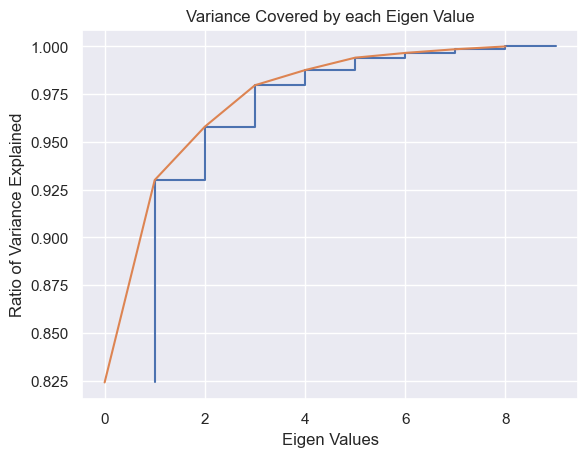

In [80]:
plt.step(list(range(1,10)), np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance Explained')
plt.title('Variance Covered by each Eigen Value')
#plt.text(0.9, 1.00, '95% cut-off threshold', color = 'red', fontsize=16)
plt.show()

In [81]:
pca = PCA(n_components=5, random_state=42)  

# fit_transform() computes the principal components 
# pass the standardized data to fit PCA
PrincipalComponents = pca.fit_transform(df3)

In [82]:
PCA_df = pd.DataFrame(data = PrincipalComponents, columns = ['PC' + str(i) for i in range(1,6)])

# head() to display top five rows
PCA_df.head()

,PC1,PC2,PC3,PC4,PC5
0,0.22,0.64,0.09,0.05,-0.04
1,-0.08,-0.17,-0.21,-0.09,0.02
2,-0.96,-0.13,-0.13,0.05,-0.10
3,-1.51,0.47,0.28,0.07,-0.09
4,-0.26,-0.24,-0.06,-0.08,-0.03


This is a very effective method where we add up the variances of all the features in cummulative format.
Typically eigen values with more than 95% of ratio of variance are selected.
They correspond to the columns of the PCA generated dataframe.
In this case, we select the Eigen Value : 2 as the steps generated have significant variances and thus the other features get dominated by their variances.

In this way, we reduce the dimensions

### Q4. Build a Kmeans model by selecting optimal number of clusters using elbow method ?

K-Means Clustering is a distance based algorithm that is used for unsupervised learning that does not support categorical features.
It is the most preferred algorithm for dealing with Unsupervised Learning that does the job of finding clusters the in data but with a mathematical approach :
Selects 2 (assume k = 2) centroids randomly.
Distance between the centroids and all the data points are calculated.
If the data point is closer to one of the centroids, then it gets labelled as that centroid and vice-versa.
For the 2 clusters formed, average value of the data points, grouped with either of the centroid, is calculated and these average values are then defined as the new clusters.
This process repeats itself untill both centroids converge to fixed points.
k hyperparameter : It defines the number of clusters or groups the data is to be divided into. For the selection of values of k, we use 2 statistical tests :
Elbow Method : It is a method that plots the sum of squared error for a range of values of k. If this plot looks like an arm, then k is the value that resembles an elbow is selected. From this elbow value, sum of squared values (inertia) starts decreasing in a linear fashion and thus is considered as an optimal value.
Silhouette Score Method : It is a method that evaluates the quality of clusters in terms of how well data points are clustered with other data points that are similar to each other. This score is calculated using the distance formula and the k value with highest score is selected for modeling.



Elbow Method & Silhouette Score Method

In [100]:
m1 = df2.drop(columns = ['Country']).values # Feature Combination : Health - Trade - Finance
m2 = pca_df2.values # PCA Data
df_Kmeans=PCA_df.copy()

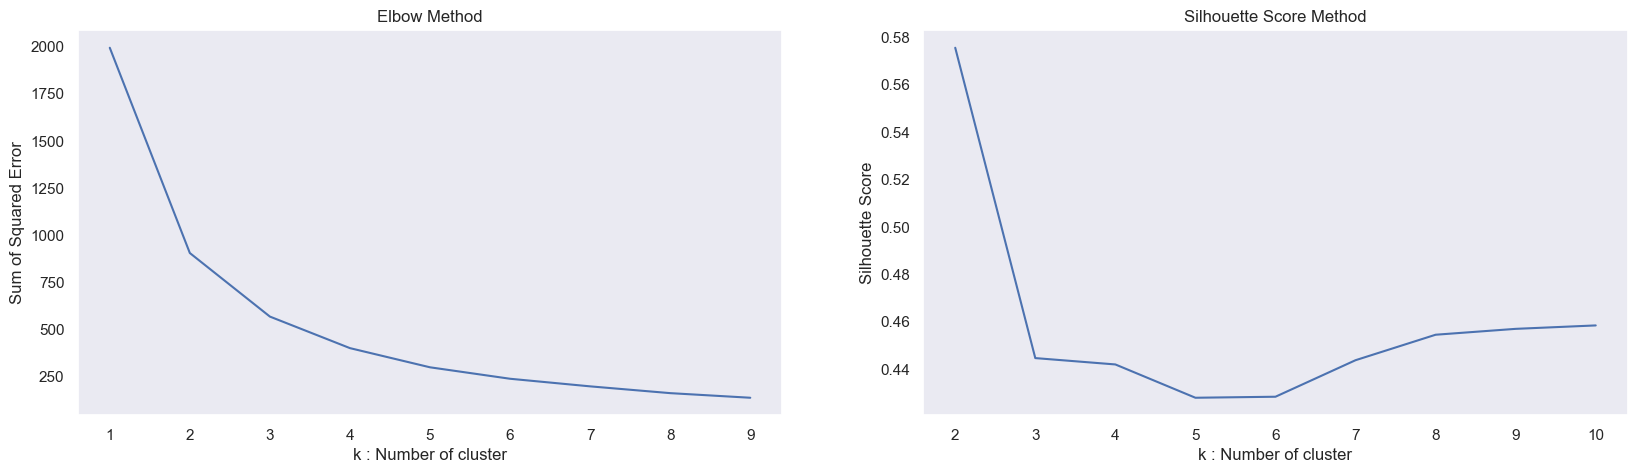

In [101]:
sse = {};sil = [];kmax = 10
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

# Elbow Method :
plt.subplot(1,2,1)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(m1)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.grid()

# Silhouette Score Method
plt.subplot(1,2,2)
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters = k).fit(m1)
    labels = kmeans.labels_
    sil.append(silhouette_score(m1, labels, metric = 'euclidean'))
sns.lineplot(x = range(2,kmax + 1), y = sil);
plt.title('Silhouette Score Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.grid()


From the results of the above 2 methods, we select :
k : Clusters = 3

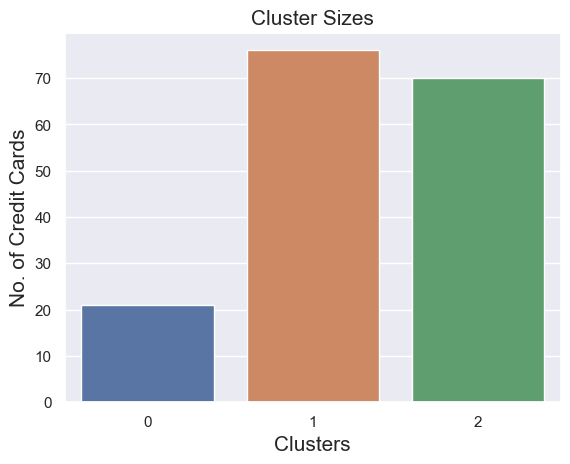

In [102]:
Kmodel = KMeans(n_clusters= 3, random_state= 10)

Kmodel.fit(m1)
KMeans(n_clusters=3, random_state=10)
df_Kmeans['Cluster'] = Kmodel.fit_predict(m1)
sns.countplot(data= df_Kmeans, x = 'Cluster')


plt.title('Cluster Sizes', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('No. of Credit Cards', fontsize = 15)

plt.show()

### Q5. Find optimal number of clusters using silhouette test ?

In [105]:
from sklearn.metrics import silhouette_score
# create a list for different values of K
n_clusters=[2,3,4,5,6,7,8]
#use 'for' loop to build the clusters
# 'random_state' returns the same sample each time you run the code  
# fit and predict on the scaled data
# 'silhouette_score' function computes the silhouette score for each K
for K in n_clusters:
    cluster=KMeans(n_clusters=k,random_state=10)
    predict=cluster.fit_predict(m1)
    score=silhouette_score(m1,predict,random_state=10)
    print("For n_clusters={}, silhoutte score is {}".format(K,score))

For n_clusters=2, silhoutte score is 0.44527037509013706
For n_clusters=3, silhoutte score is 0.44527037509013706
For n_clusters=4, silhoutte score is 0.44527037509013706
For n_clusters=5, silhoutte score is 0.44527037509013706
For n_clusters=6, silhoutte score is 0.44527037509013706
For n_clusters=7, silhoutte score is 0.44527037509013706
For n_clusters=8, silhoutte score is 0.44527037509013706


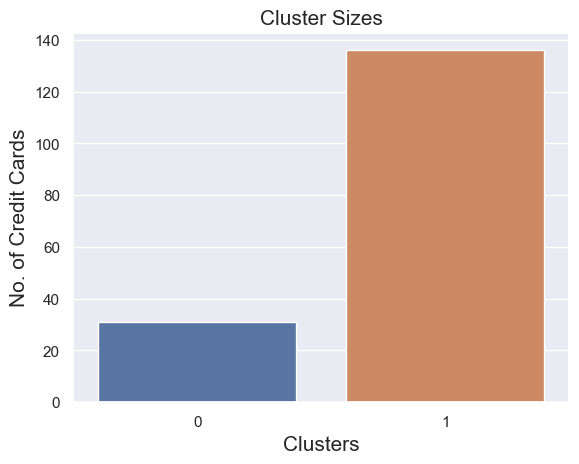

In [107]:
Kmodel=KMeans(n_clusters=2,random_state=10)
Kmodel.fit(m1)
KMeans(n_clusters=2,random_state=10)
df_Kmeans['Cluster']=Kmodel.fit_predict(m1)
sns.countplot(data=df_Kmeans,x='Cluster')
plt.title('Cluster Sizes', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('No. of Credit Cards', fontsize = 15)

plt.show()